In [31]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# Object description

We are going to use the Hu Moments to describe and group different objects in images. In the folder called _data_ you can find a simple image with different objects.

## Load and binarize the image

The first job is to load the image and binarize it. It is important to load the image using the `cv2.IMREAD_GRAYSCALE` parameter in order to obtain a 2D matrix. Show the binarized image in order to check this part of the process.

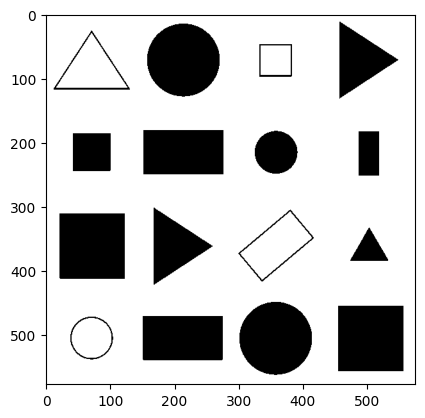

In [50]:
filename = "data/simple_shapes.png"
im = cv2.imread(filename, 0)
_,bin = cv2.threshold(im,150,255,cv2.THRESH_BINARY)


plt.imshow(bin, cmap='gray')
plt.show()

## Contour detection

As you did in the segmentation assignment of the Image Analysis subject, you have to use the `findContours` function to detect all the objects in the image. In order to check if you have performed a correct detection you have to draw the contours on the image and visualize them.

_Extra_: Given a contour, you can obtain its bounding box by using the `boundingRect` function.


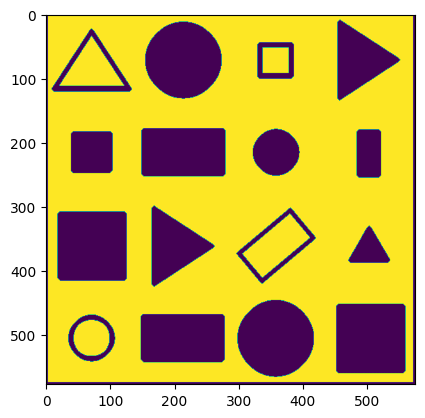

In [56]:
contours, hierarchy = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

clone = bin.copy()

plt.imshow(cv2.drawContours(clone, contours, -1, (0,255,0), 3))
plt.show()

## Descriptor

As we stated before, you are going to describe each object by means of the *moments*. _OpenCV_ has a built-in function for calculating Hu Moments. It is called `HuMoments` and it takes as input the central moments of the image which can be calculated using the function `moments`. The function `moments` can receive a binary image or a set of points describing a contour.

The Hu Moments obtained have a large range, so we can apply a log transform by using next code: `moment_i = -1* copysign(1.0, moment_i) * log10(abs(moment_i)))`. The `copysign` and `log10` functions are part of the _math_ library.


In [60]:
import math 
# Calculate Moments 
moments = cv2.moments(bin) 
# Calculate Hu Moments 
huMoments = cv2.HuMoments(moments)
# Log scale hu moments 
for i in range(0,7):
   huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))

## Shape matching

Now you have a descriptor for each object. Next step is to calculate the euclidean distance between the shapes and try to obtain groups of similar objects.

**This is a challenging step!!**

In [ ]:
d1 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I1,0) 
d2 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I2,0) 
d3 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I3,0)